In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Video%20Game%20Sales%20and%20Ratings/Video_Game_Sales_as_of_Jan_2017.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [8]:
data = data[data.Year_of_Release.notnull()]

data = data.loc[data.Year_of_Release < 2017]

data.Year_of_Release = data['Year_of_Release'].astype(int)

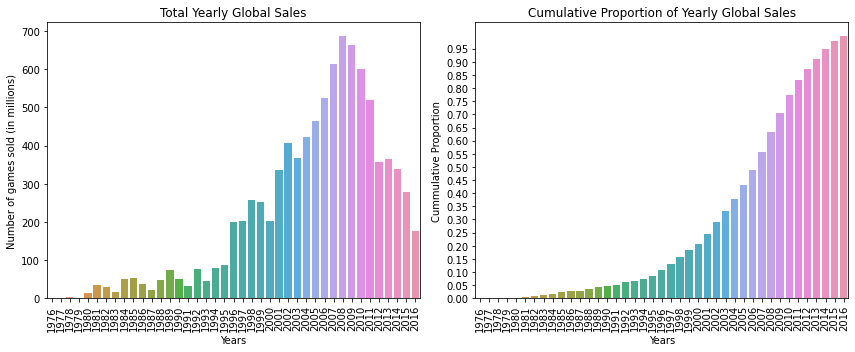

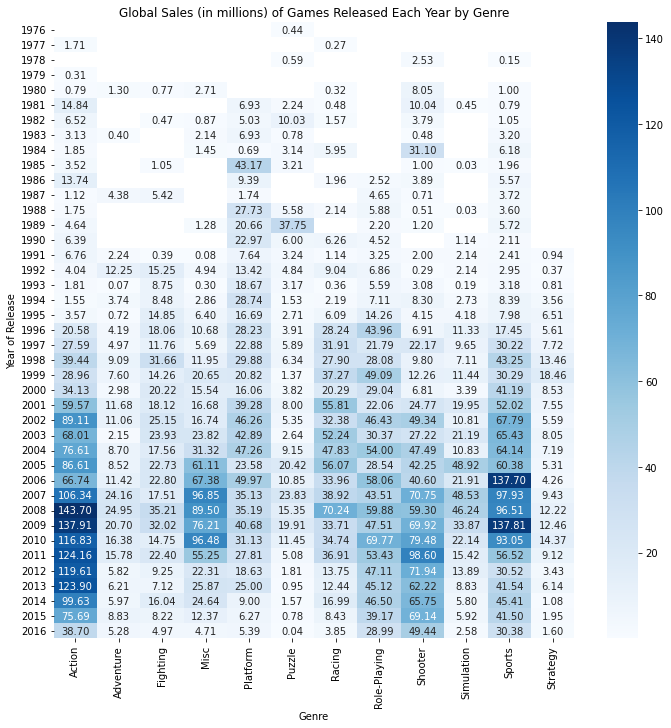

In [9]:
Sales_by_Gen_and_Yr = pd.pivot_table(data,index=['Year_of_Release'],
                     columns=['Genre'],values=['Global_Sales'],aggfunc=np.sum)
Sales_by_Gen_and_Yr.columns = Sales_by_Gen_and_Yr.columns.get_level_values(1)

Yearly_Tots = Sales_by_Gen_and_Yr.sum(axis=1)
Yearly_Tots = Yearly_Tots.sort_index()
YT1_cumsum = Yearly_Tots.cumsum()/Yearly_Tots.sum()

fig = plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.barplot(y = Yearly_Tots.values, x = Yearly_Tots.index,ax=ax1)
ax1.set_title('Total Yearly Global Sales')
plt.setp(ax1.get_xticklabels(),rotation=90)
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of games sold (in millions)')

sns.barplot(y = YT1_cumsum.values, x = YT1_cumsum.index, ax=ax2)
ax2.set_title('Cumulative Proportion of Yearly Global Sales')
plt.setp(ax2.get_xticklabels(),rotation=90)
ax2.set_xlabel('Years')
ax2.set_ylabel('Cummulative Proportion')
ax2.yaxis.set_ticks(np.arange(0,1,0.05))
fig.tight_layout()

plt.figure(figsize=(10,10))
sns.heatmap(Sales_by_Gen_and_Yr,annot = True, fmt = '.2f', cmap = 'Blues')
plt.tight_layout()
plt.ylabel('Year of Release')
plt.xlabel('Genre')
plt.title('Global Sales (in millions) of Games Released Each Year by Genre')
plt.show()

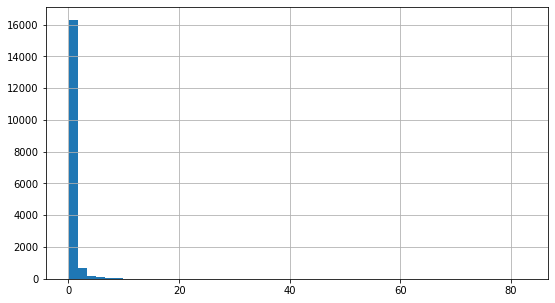

In [10]:
plt.figure(figsize=(9,5))
data.Global_Sales.hist(bins=50)
plt.show()

In [11]:
data = data.loc[data.Year_of_Release >= 1991]

Med_Sales_by_Gen_and_Yr = pd.pivot_table(data,index=['Year_of_Release'],
                     columns=['Genre'],values=['Global_Sales'],aggfunc=np.median)
Med_Sales_by_Gen_and_Yr.columns = Med_Sales_by_Gen_and_Yr.columns.get_level_values(1)

Med_Sales_by_Gen_and_Yr.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1991,0.420,1.120,0.39,0.080,0.78,0.585,1.140,0.38,0.23,1.070,0.280,0.215
1992,2.020,0.475,1.66,2.470,1.00,1.120,4.520,0.97,0.13,2.140,0.370,0.060
1993,0.145,0.070,0.45,0.060,0.56,0.980,0.180,0.32,1.54,0.190,0.180,0.405
1994,0.050,0.435,0.18,0.050,1.79,0.700,0.190,0.12,0.33,0.280,0.345,0.310
1995,0.380,0.050,0.23,0.085,0.30,0.175,0.155,0.34,0.10,0.085,0.190,0.125


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn

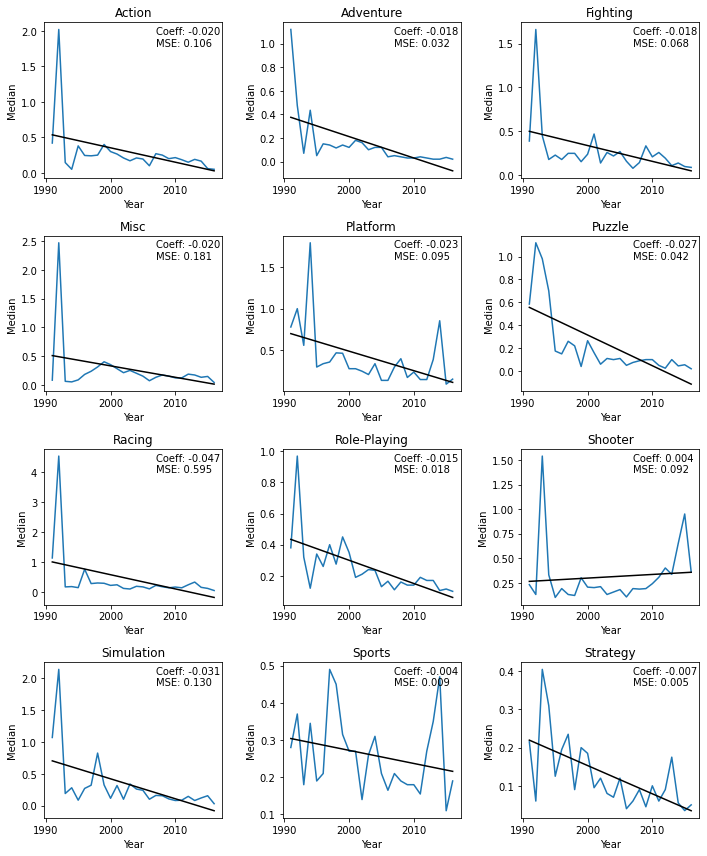

In [12]:
def Linear_Regression_Plot(Data):
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,12))

    x_data = np.transpose(np.matrix(Data.index))

    count = 0
    
    for genre in Data.columns:
        axs = axes[count//3,count%3]
        y_data = Data[genre].to_frame()
    
    
        regr = linear_model.LinearRegression()
        regr.fit(x_data,y_data)
        
        MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
        Regr_Coeff.append(regr.coef_[0][0])
        Regr_MSE.append(MSE[0])

        Data[genre].plot(ax=axs)
        axs.plot(x_data,regr.predict(x_data), color='black')

        y_lims = axs.get_ylim()
        
        
        txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
        y_loc = 0.85*(y_lims[1]-y_lims[0])+y_lims[0]
        axs.text(2007,y_loc,txt)

        axs.set_title(genre)
        axs.set_xlabel('Year')
        axs.set_ylabel('Median')
        count+=1
    fig.tight_layout()
    
    return [Regr_Coeff,Regr_MSE]
    
[Regr_Coeff,Regr_MSE] = Linear_Regression_Plot(Med_Sales_by_Gen_and_Yr)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn

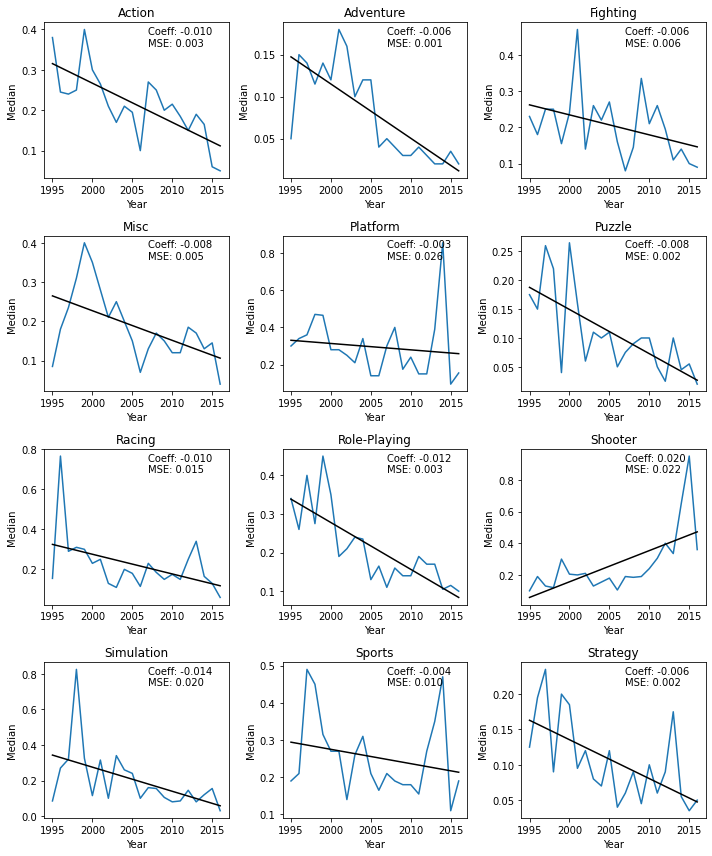

In [13]:
Med_Sales_by_Gen_and_Yr = Med_Sales_by_Gen_and_Yr.loc[Med_Sales_by_Gen_and_Yr.index >= 1995]

[Regr_Coeff_After_95,Regr_MSE_After_95] = Linear_Regression_Plot(Med_Sales_by_Gen_and_Yr)

In [14]:
Linear_Regression_Results = pd.DataFrame({'Regression Coeff After 1991':Regr_Coeff,
                                         'MSE After 1991':Regr_MSE,
                                         'Regression Coeff After 1995':Regr_Coeff_After_95,
                                         'MSE After 1995':Regr_MSE_After_95},
                                        index = list(Med_Sales_by_Gen_and_Yr.columns))
Column_Order = ['Regression Coeff After 1991','MSE After 1991','Regression Coeff After 1995',
                'MSE After 1995']

Linear_Regression_Results[Column_Order].head(n=len(list(Med_Sales_by_Gen_and_Yr.columns)))

,Regression Coeff After 1991,MSE After 1991,Regression Coeff After 1995,MSE After 1995
Action,-0.020282,0.106425,-0.009695,0.003197
Adventure,-0.018154,0.031658,-0.006460,0.001132
Fighting,-0.017986,0.068396,-0.005517,0.006490
Misc,-0.019853,0.181360,-0.007549,0.005385
Platform,-0.023383,0.095485,-0.003425,0.025815
Puzzle,-0.026802,0.041777,-0.007662,0.002454
Racing,-0.047101,0.595477,-0.009825,0.015206
Role-Playing,-0.014938,0.018042,-0.012120,0.003419
Shooter,0.003713,0.092050,0.019701,0.021505
Simulation,-0.031340,0.129551,-0.013569,0.019819


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Text(0, 0.5, 'Median Sales (in millions)')

<Figure size 936x360 with 0 Axes>

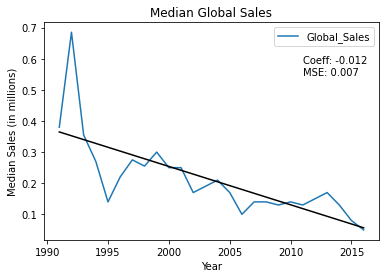

In [15]:
Med_Sales_by_Yr = pd.pivot_table(data,index=['Year_of_Release'],
                     values=['Global_Sales'],aggfunc=np.median)


fig = plt.figure(figsize=(13,5))
Med_Sales_by_Yr.plot()

x_data = np.transpose(np.matrix(Med_Sales_by_Yr.index))
y_data = Med_Sales_by_Yr
regr = linear_model.LinearRegression()
regr.fit(x_data,y_data)

plt.plot(x_data,regr.predict(x_data), color='black')

txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,np.mean((regr.predict(x_data)-y_data)**2))

plt.text(2011,0.8*Med_Sales_by_Yr.max(),txt)

plt.title('Median Global Sales')
plt.xlabel('Year')
plt.ylabel('Median Sales (in millions)')